# Import Libraries

In [1]:
import numpy as np
import sklearn
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.decomposition import FastICA
from sklearn.externals.six import StringIO  
from sklearn.svm import SVC
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.tree import export_graphviz
import graphviz
import pydotplus
from pydotplus import graphviz
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import export_graphviz
import warnings
warnings.filterwarnings('ignore')

# Data Reading and Cleaning

In [2]:
df=pd.read_csv("phl_hec_all_confirmed.csv", error_bad_lines=False)
df=df[["P. Name","P. Mass (EU)","P. Radius (EU)","P. Density (EU)","P. Gravity (EU)","P. Esc Vel (EU)","P. SFlux Mean (EU)","P. Teq Mean (K)","P. Surf Press (EU)","P. Period (days)","P. Sem Major Axis (AU)","P. Mean Distance (AU)","P. Eccentricity","S. Mass (SU)","S. Radius (SU)","S. Teff (K)","S. Luminosity (SU)","S. [Fe/H]","S. Hab Zone Min (AU)","S. Hab Zone Max (AU)","P. Habitable Class"]]
df=df.dropna()
df.head()

b'Skipping line 3742: expected 68 fields, saw 69\nSkipping line 3743: expected 68 fields, saw 69\n'


,P. Name,P. Mass (EU),P. Radius (EU),P. Density (EU),P. Gravity (EU),P. Esc Vel (EU),P. SFlux Mean (EU),P. Teq Mean (K),P. Surf Press (EU),P. Period (days),...,P. Mean Distance (AU),P. Eccentricity,S. Mass (SU),S. Radius (SU),S. Teff (K),S. Luminosity (SU),S. [Fe/H],S. Hab Zone Min (AU),S. Hab Zone Max (AU),P. Habitable Class
17,4 Uma b,2257.37,11.67,1.42,16.57,13.91,163.7823,877.3,3205.8,269.30,...,0.78,0.43,1.23,18.11,4415.0,111.801993,-0.25,8.480,21.034,non-habitable
19,7 CMa b,782.13,11.44,0.52,5.98,8.27,0.6887656,230.0,408.7,796.00,...,1.88,0.22,1.52,2.30,4792.0,2.502723,0.21,1.251,3.050,non-habitable
20,8 Umi b,476.91,10.92,0.37,4.00,6.61,202.5754,960.5,174.8,93.40,...,0.49,0.06,1.80,9.90,4847.4,48.550717,-0.03,5.496,13.371,non-habitable
21,11 Com b,6168.04,10.98,4.66,51.15,23.70,101.1515,799.7,28729.5,326.03,...,1.26,0.23,2.70,19.00,4742.0,163.773362,-0.35,10.140,24.781,non-habitable
23,11 UMi b,3338.37,11.54,2.17,25.05,17.00,78.07546,756.4,7242.6,516.22,...,1.54,0.08,1.80,24.08,4340.0,184.570281,0.04,10.921,27.187,non-habitable


In [3]:
df.columns

Index(['P. Name', 'P. Mass (EU)', 'P. Radius (EU)', 'P. Density (EU)',
       'P. Gravity (EU)', 'P. Esc Vel (EU)', 'P. SFlux Mean (EU)',
       'P. Teq Mean (K)', 'P. Surf Press (EU)', 'P. Period (days)',
       'P. Sem Major Axis (AU)', 'P. Mean Distance (AU)', 'P. Eccentricity',
       'S. Mass (SU)', 'S. Radius (SU)', 'S. Teff (K)', 'S. Luminosity (SU)',
       'S. [Fe/H]', 'S. Hab Zone Min (AU)', 'S. Hab Zone Max (AU)',
       'P. Habitable Class'],
      dtype='object')

# Visualize Data by Reducing Dimensionality

non-habitable:2065
mesoplanet:20
psychroplanet:14
thermoplanet:2
hypopsychroplanet:3


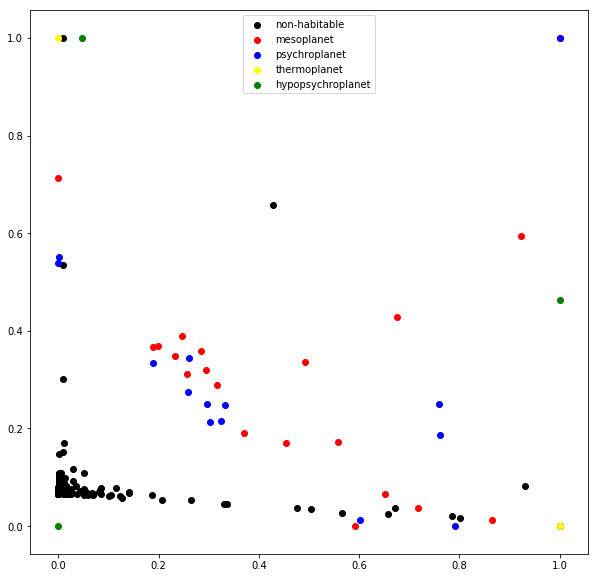

In [4]:
labels=df["P. Habitable Class"].unique().tolist()
colors=["black","red","blue","yellow","green"]
plt.figure(figsize=(10,10))
for x in range(len(labels)):
    data=df[df["P. Habitable Class"]==labels[x]]
    print(labels[x]+":"+str(len(data)))
    data=data[["P. Mass (EU)","P. Radius (EU)","P. Density (EU)","P. Gravity (EU)","P. Esc Vel (EU)","P. SFlux Mean (EU)","P. Teq Mean (K)","P. Surf Press (EU)","P. Period (days)","P. Sem Major Axis (AU)","P. Mean Distance (AU)","P. Eccentricity","S. Mass (SU)","S. Radius (SU)","S. Teff (K)","S. Luminosity (SU)","S. [Fe/H]","S. Hab Zone Min (AU)","S. Hab Zone Max (AU)"]]
    pca = sklearnPCA(n_components=2,random_state=0)
    reduced = pd.DataFrame(pca.fit_transform(data))
    reduced= (reduced - reduced.min())/(reduced.max() - reduced.min())
    plt.scatter(reduced[0], reduced[1], label=labels[x], c=colors[x])
    
plt.legend()
plt.show()

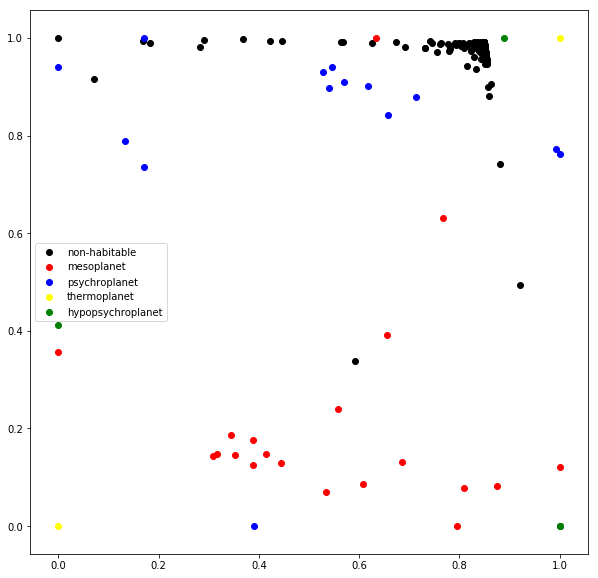

In [5]:
labels=df["P. Habitable Class"].unique().tolist()
colors=["black","red","blue","yellow","green"]
plt.figure(figsize=(10,10))
for x in range(len(labels)):
    data=df[df["P. Habitable Class"]==labels[x]]
    data=data[["P. Mass (EU)","P. Radius (EU)","P. Density (EU)","P. Gravity (EU)","P. Esc Vel (EU)","P. SFlux Mean (EU)","P. Teq Mean (K)","P. Surf Press (EU)","P. Period (days)","P. Sem Major Axis (AU)","P. Mean Distance (AU)","P. Eccentricity","S. Mass (SU)","S. Radius (SU)","S. Teff (K)","S. Luminosity (SU)","S. [Fe/H]","S. Hab Zone Min (AU)","S. Hab Zone Max (AU)"]]
    ica = FastICA(n_components=2,max_iter=1000,random_state=0)
    reduced = pd.DataFrame(ica.fit_transform(data))
    reduced= (reduced - reduced.min())/(reduced.max() - reduced.min())
    plt.scatter(reduced[0], reduced[1], label=labels[x], c=colors[x])
    
plt.legend()
plt.show()

# K-Nearest Neighbor

## Find Optimal Number of Neighbors

### With Normalization

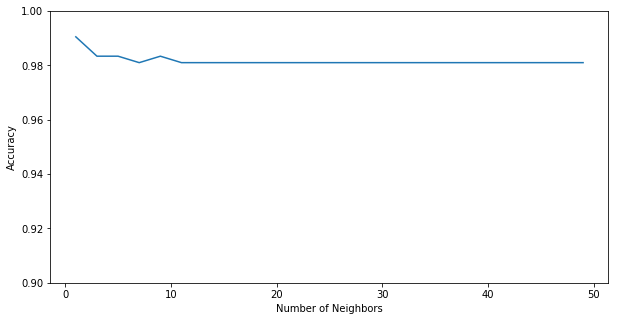

In [6]:
features=["P. Mass (EU)","P. Radius (EU)","P. Density (EU)","P. Gravity (EU)","P. Esc Vel (EU)","P. SFlux Mean (EU)","P. Teq Mean (K)","P. Surf Press (EU)","P. Period (days)","P. Sem Major Axis (AU)","P. Mean Distance (AU)","P. Eccentricity","S. Mass (SU)","S. Radius (SU)","S. Teff (K)","S. Luminosity (SU)","S. [Fe/H]","S. Hab Zone Min (AU)","S. Hab Zone Max (AU)"]
label=["P. Habitable Class"]
x=df[features]
y=df[label]
train_data, test_data, train_lbl, test_lbl = train_test_split(x,y, test_size=.20, random_state=0,stratify=y)
plotx=[]
ploty=[]
for x in range(1,51,2):
    neigh = KNeighborsClassifier(n_neighbors=x)
    neigh.fit(train_data, train_lbl) 
    acc=neigh.score(test_data,test_lbl)
    plotx.append(x)
    ploty.append(acc)
    #print("Accuracy at "+str(x)+" neighbors:"+str(acc))
plt.figure(figsize=(10,5))
plt.ylim(0.9,1)
plt.plot(plotx,ploty)
plt.ylabel('Accuracy');
plt.xlabel('Number of Neighbors');
plt.show()

### Without Normalization

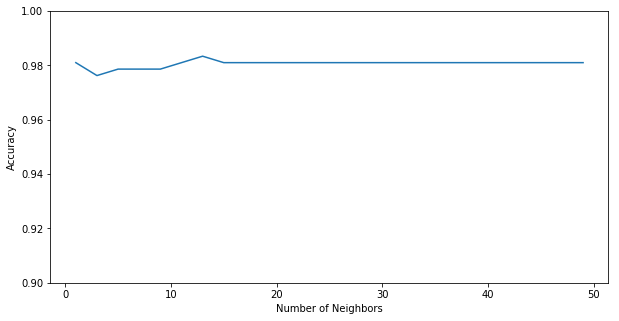

In [7]:
features=["P. Mass (EU)","P. Radius (EU)","P. Density (EU)","P. Gravity (EU)","P. Esc Vel (EU)","P. SFlux Mean (EU)","P. Teq Mean (K)","P. Surf Press (EU)","P. Period (days)","P. Sem Major Axis (AU)","P. Mean Distance (AU)","P. Eccentricity","S. Mass (SU)","S. Radius (SU)","S. Teff (K)","S. Luminosity (SU)","S. [Fe/H]","S. Hab Zone Min (AU)","S. Hab Zone Max (AU)"]
label=["P. Habitable Class"]
x=df[features]
y=df[label]
scaler = MinMaxScaler()
x=scaler.fit_transform(x)
train_data, test_data, train_lbl, test_lbl = train_test_split(x,y, test_size=.20, random_state=0,stratify=y)
plotx=[]
ploty=[]
for x in range(1,51,2):
    neigh = KNeighborsClassifier(n_neighbors=x)
    neigh.fit(train_data, train_lbl) 
    acc=neigh.score(test_data,test_lbl)
    plotx.append(x)
    ploty.append(acc)
    #print("Accuracy at "+str(x)+" neighbors:"+str(acc))
plt.figure(figsize=(10,5))
plt.ylim(0.9,1)
plt.plot(plotx,ploty)
plt.ylabel('Accuracy');
plt.xlabel('Number of Neighbors');
plt.show()

## Preventing Curse of Dimensionality

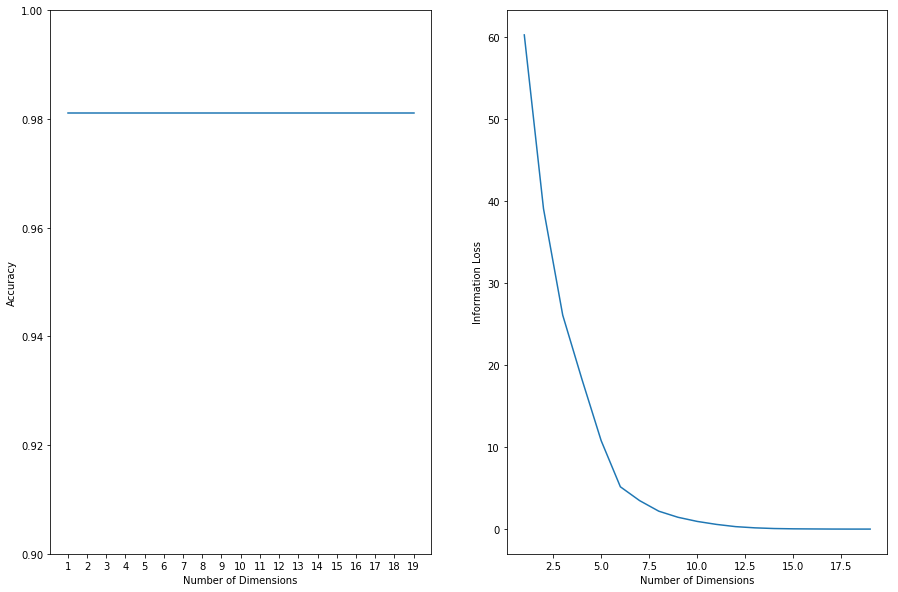

0.9809976247030879


In [8]:
plotx=[]
ploty=[]
dimensionx=[]
dimensiony=[]
for x in range(1,len(features)+1):
    neigh = KNeighborsClassifier(n_neighbors=20)
    data = df[features]
    scaler = MinMaxScaler()
    data=scaler.fit_transform(data)
    pca = sklearnPCA(n_components=x,random_state=0)
    data = pd.DataFrame(pca.fit_transform(data))
    loss=(1-sum(pca.explained_variance_ratio_))*100
    #print("Information Loss at "+str(x)+" dimensions:"+str(loss))
    y=df[label]
    train_data, test_data, train_lbl, test_lbl = train_test_split(data,y, test_size=.20, random_state=0,stratify=y)
    neigh.fit(train_data, train_lbl) 
    acc=neigh.score(test_data,test_lbl)
    plotx.append(x)
    ploty.append(acc)
    dimensionx.append(x)
    dimensiony.append(loss)
    #print("Accuracy at "+str(x)+" neighbors:"+str(acc))
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.xticks(range(0,20))
plt.ylim(.9,1)
plt.plot(plotx,ploty)
plt.ylabel('Accuracy');
plt.xlabel('Number of Dimensions');
plt.subplot(1,2,2)
plt.plot(dimensionx,dimensiony)
plt.ylabel('Information Loss');
plt.xlabel('Number of Dimensions');
plt.show()
print(ploty[15])

# Support Vector Machines

In [9]:
kernels=[]
accuracy=[]

In [10]:
x=df[features]
y=df[label]
scaler = MinMaxScaler()
x=scaler.fit_transform(x)
train_data, test_data, train_lbl, test_lbl = train_test_split(x,y, test_size=.20, random_state=0,stratify=y)
clf = SVC(random_state=0,kernel="rbf",gamma=.7)
clf.fit(train_data, train_lbl)
acc=clf.score(test_data,test_lbl)
accuracy.append(acc)
kernels.append("RBF Kernel")
print(acc)

0.9809976247030879


In [11]:
x=df[features]
y=df[label]
scaler = MinMaxScaler()
x=scaler.fit_transform(x)
train_data, test_data, train_lbl, test_lbl = train_test_split(x,y, test_size=.20, random_state=0,stratify=y)
clf = SVC(random_state=0,kernel="poly")
clf.fit(train_data, train_lbl)
acc=clf.score(test_data,test_lbl)
kernels.append("Poly Kernel with Degree 3")
accuracy.append(acc)
print(acc)

0.9809976247030879


In [12]:
x=df[features]
y=df[label]
scaler = MinMaxScaler()
x=scaler.fit_transform(x)
train_data, test_data, train_lbl, test_lbl = train_test_split(x,y, test_size=.20, random_state=0,stratify=y)
clf = SVC(random_state=0,kernel="linear")
clf.fit(train_data, train_lbl)
acc=clf.score(test_data,test_lbl)
kernels.append("Linear")
accuracy.append(acc)
print(acc)

0.9809976247030879


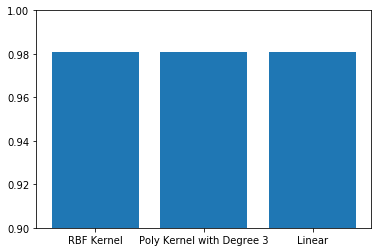

[0.9809976247030879, 0.9809976247030879, 0.9809976247030879]


In [13]:
plt.figure()
plt.bar(kernels,accuracy)
plt.ylim(.9,1)
plt.show()
print(accuracy)

# Decision Trees

In [14]:
x=df[features]
y=df[label]
train_data, test_data, train_lbl, test_lbl = train_test_split(x,y, test_size=.20, random_state=0,stratify=y)
clf = tree.DecisionTreeClassifier(random_state=0)
clf = clf.fit(train_data, train_lbl)
clf.score(test_data,test_lbl)

0.995249406175772

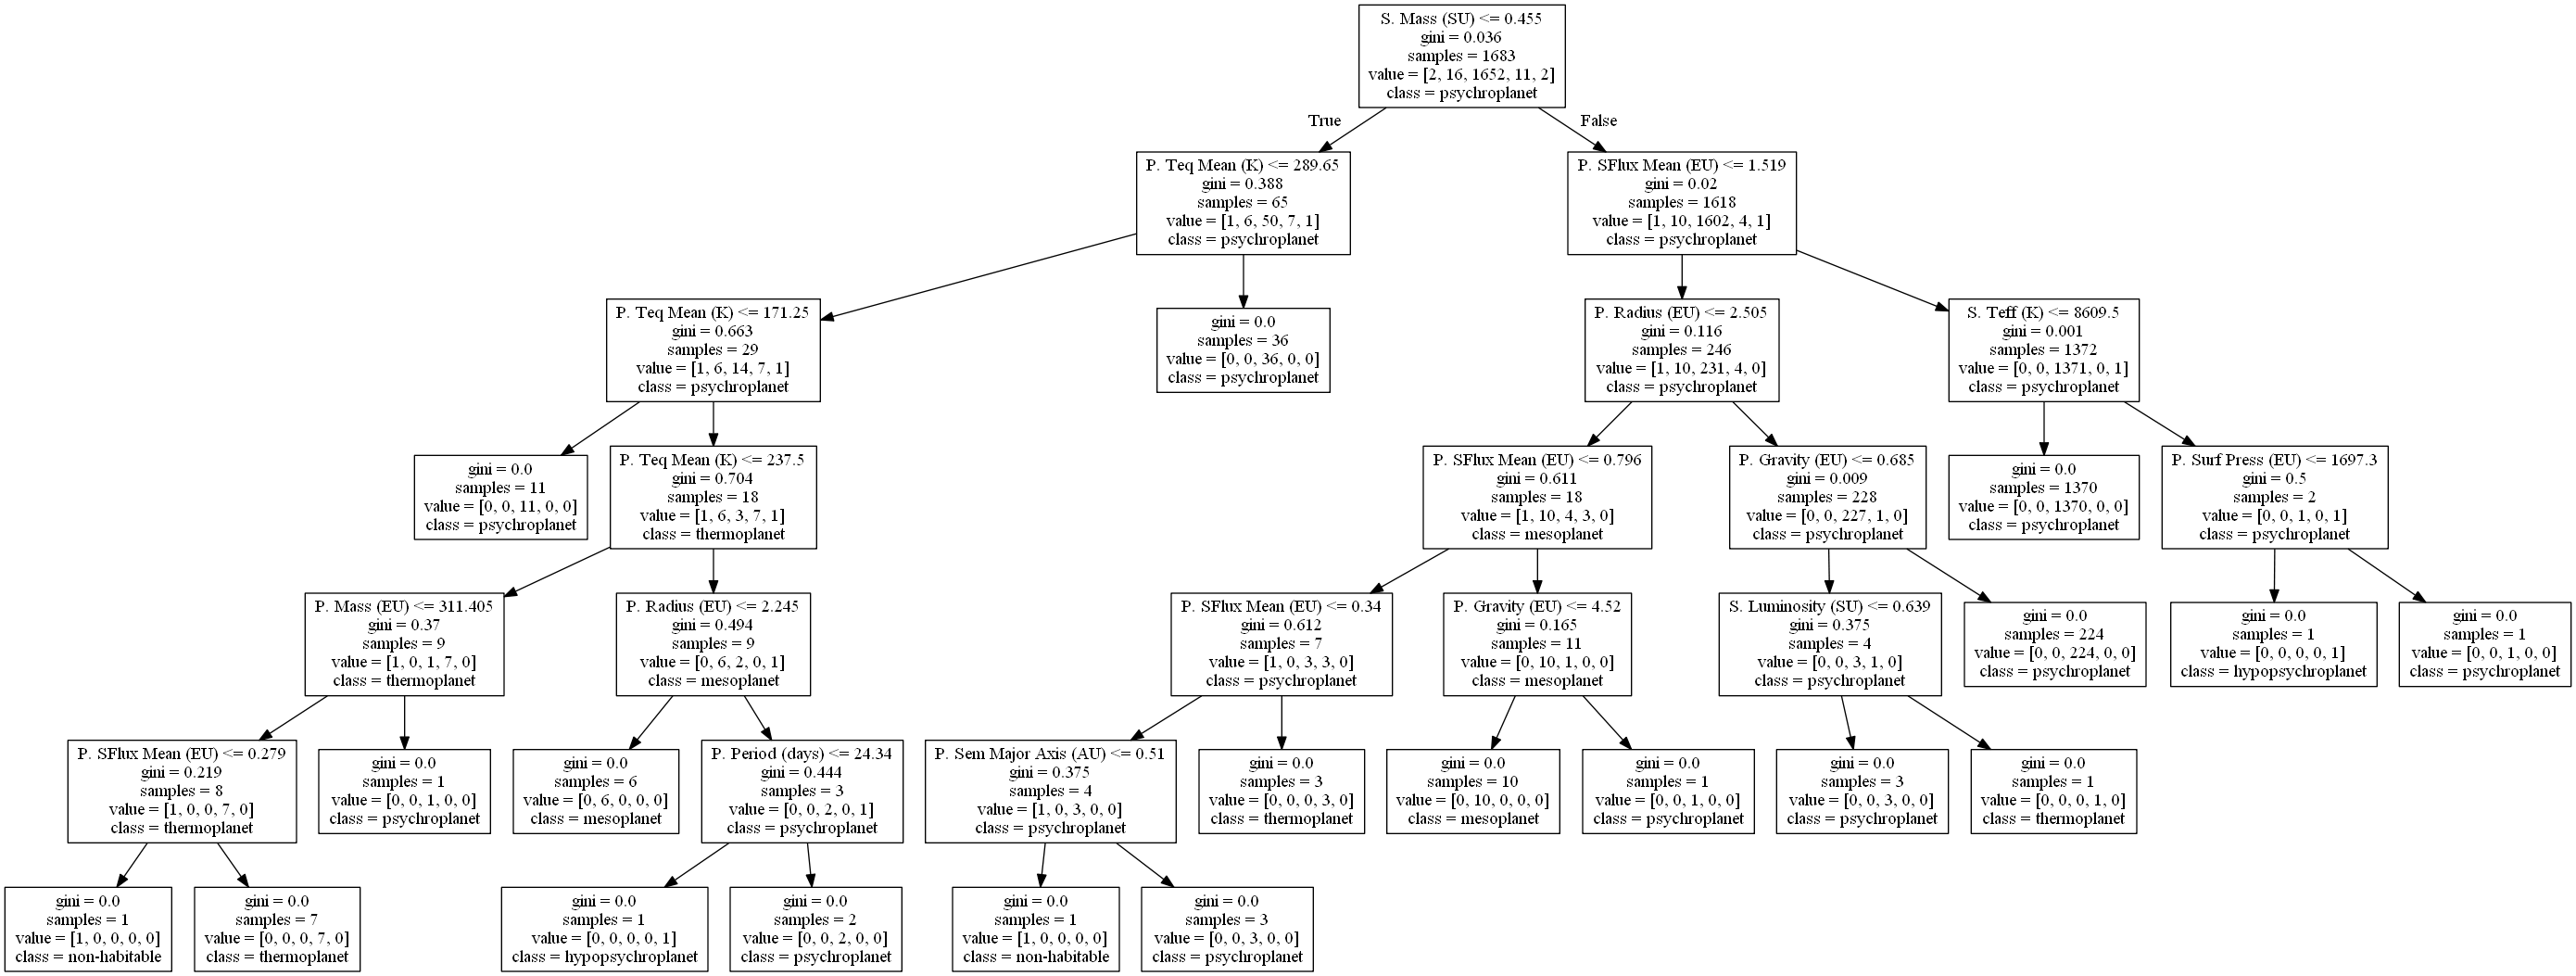

In [15]:
graph = pydotplus.graph_from_dot_data(tree.export_graphviz(clf,feature_names = features,class_names = labels))  
Image(graph.create_png())